# Declaration of Originality

![image.png](attachment:image.png)

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Foo Jing Heng Anson (2401482A)
* Tutorial Group                :  T07
* Tutor						    :  Ms Ester Goh
* Submission Date               : 11/02/26


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: Student depression is a increasing concern amongst schools and will negatively affect student's performance, well-being and even lead to undesirable consequences. Early identification of students at risk of depression allows instituitions to take action early and prevent tragedies from happening. This machine model aims to predict student's depression risk using various aspects such as pressure the student is facing, lifestyle, and academic related features.


# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "depression.csv"
# Load the dataset to understand its structure and identify relevant features
df = pd.read_csv(FILE_PATH);
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## 2.2 Summary Statistics

In [3]:
## Display the first few rows of the dataset to understand its structure
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Justification: df.head() is used to understand the struture of the data which helps me verify whether the data has loaded properly and help me detect early obvious issues with the data such as unexpected symbols.


In [4]:
# Display dataset structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Justification: df.info() is used for me to understand the diffrent data types and the number of non-null values so that I can identify any invalid data types. 

Intepretation: I found that the "Financial Stress" feature has a wrong data type as it should be float64 similar to "Academic Pressure" and "Work Pressure".

In [5]:
df.describe(include='all')


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


Justification: df.describe() is used to help me analyse the data and detect anomalies, any extreme values and ensure data quality. 

Intepretation: The "Age" feature has a max of 59 which is a potential anomaly because the dataset is mostly students. There are also 2 high-cardinity features "City" with 52 unqiue values and "Degree" with 28 unique values which should be considered for dropping as doing one-hot encoding will significantly increase dimentionality and increase the risk of overfitting. Featurss such as "Job Satisfaction" and "Work Pressure" have a median and upper quatile of 0 which indicates very low or no variance. The target variable "Depression" has a mean of 0.585499 which suggest that the dataset is slightly inbalanced with more positive cases of depression than negative.

In [6]:
df['Financial Stress'].value_counts()


Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64

Justification: I used this to check for the different values the 'Financial stress' feature had. 'Financial Stress' feature had 3 invalid placeholders which affected its data type which was converted to objects.

In [7]:
df['Financial Stress'] = pd.to_numeric(
    df['Financial Stress'],
    errors='coerce'
)

Justification: Converted all the values in the column to a number. If the value could not be converted, it will be converted to NaN (Not a number).


In [8]:
# Check for missing values and display missing percentage
missing_summary = pd.DataFrame({
    "Missing Count": df.isnull().sum(),
    "Missing Percentage (%)": df.isnull().mean() * 100
})
missing_summary

,Missing Count,Missing Percentage (%)
id,0,0.000000
Gender,0,0.000000
Age,0,0.000000
City,0,0.000000
Profession,0,0.000000
Academic Pressure,0,0.000000
Work Pressure,0,0.000000
CGPA,0,0.000000
Study Satisfaction,0,0.000000
Job Satisfaction,0,0.000000


Justification: There are missing values in the "Financial Stress" column which needs to be processed to ensure data quality.

In [9]:
df = df.dropna(subset=['Financial Stress'])
df['Financial Stress'].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

Justification: Since the missing values for "Financial Stress" feature is only 3 and the missing percentage is 0.010752%, the entries were removed rather than imputed. This method avoided adding artificial values into the column while having negligible impact on the data distribution of the feature and the overall dataset.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

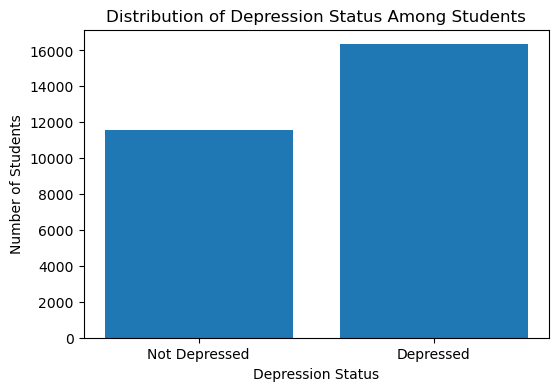

In [10]:
# Understanding Distribution of the target (Depression)
counts = df['Depression'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Distribution of Depression Status Among Students")
plt.xlabel("Depression Status")
plt.ylabel("Number of Students")
plt.xticks([0, 1], ["Not Depressed", "Depressed"])
plt.show()

Intepretation: The distribution of the target variable shows a slight class inbalance between depressed or not depressed  This inbalance in the classes indicates that there are more depressed students than not depressed students and if this data is used to train the model without addressing this class inbaalance, the model may become biased towards the majority class. This suggest that solely relying on accuracy metric may be misleading and therefore precision, recall and f1-score must be considered too as they account for the class inbalance. Recall is a metric that is important here as it focuses on the false negatives as identifying a depressed student in this context is very important.

### 2.3.1.2 Understanding distribution of features

Histogram and Boxplot are used to analyse the distribution of the numeric features

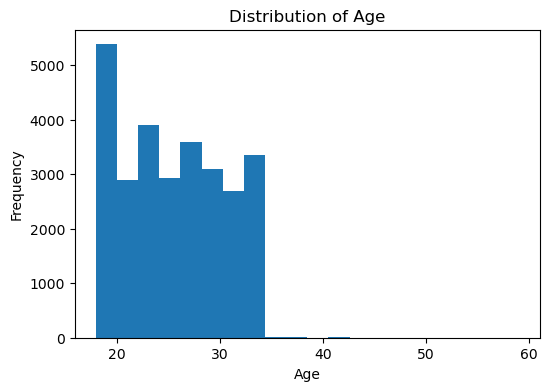

In [12]:
## Age

plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Intepretation: The age feature shows a right-skewed distribution of the data points which reflects the predominantly younger students. The peak values of this feature are in the early 20s and the values start to decrease when entering and beyond the early 30s which suggest that older individuals are rare in this dataset therefore these values could be considered anomalies or outliers. Due to the skewed nature of the graph, mean-based assumptions may be inaccurate, and therefore median-based or other outlier detection such as Interquatile Quatile Range could be more useful for pre-processing the feature.

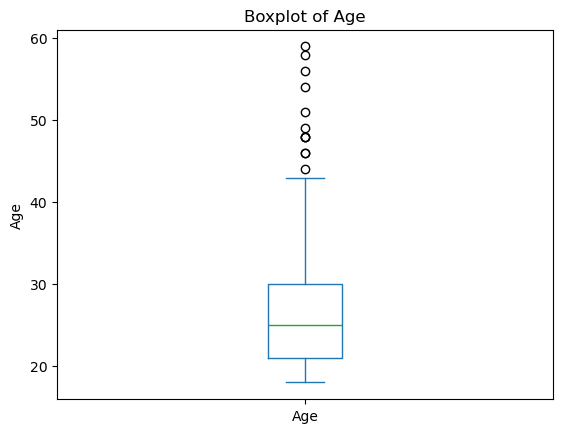

In [13]:
## Age

df['Age'].plot(kind='box')
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

intepretation: The boxplot shows that majority of the students fall in the younger age range, with a median in the mid-20s. Several upper outliers are observed, indicating that there are several older individuals within the dataset.The right-skewed distribution suggests potential influence on models sensitive to outliers, whcih will be considered subsequently for feature engineering.

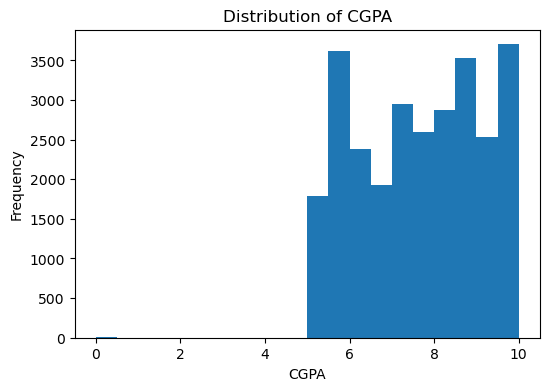

In [14]:
## CGPA

plt.figure(figsize=(6,4))
plt.hist(df['CGPA'], bins=20)
plt.title("Distribution of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()

Intepretation: This histogram shows a left-skewed distribution of the data points which is predominantly between the 5.0 to 10.0 CGPA marks. This indicates that most of the students have moderate to hugh academic performances. There is one obvious anomaly whcih is the CGPA point at 0 which is unrelistic given that CGPA can almost never be represented by 0. This unexpected CGPA value can negatively impact performance and should be removed from the dataset.

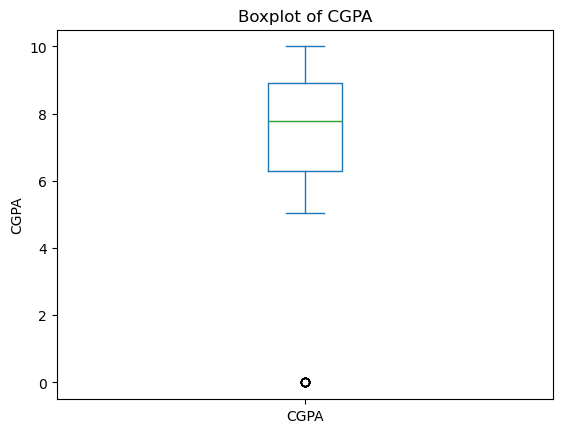

In [15]:
## CGPA

df['CGPA'].plot(kind='box')
plt.title("Boxplot of CGPA")
plt.ylabel("CGPA")
plt.show()

Intepretation: The boxplot shows the spread of the data points, the median and the outliers of the CGPA feature. The median CGPA is positioned near the upper quatile which indicates that students typically have high academic performances. The spread of the data points suggests a reasonable spread of CGPA while remaining within the expected range. One obvious outlier is observed at near 0 CGPA whcih lies way below the lower whisker. Removing or handling this outlier is important before model training to prevent it from influencing the model results.

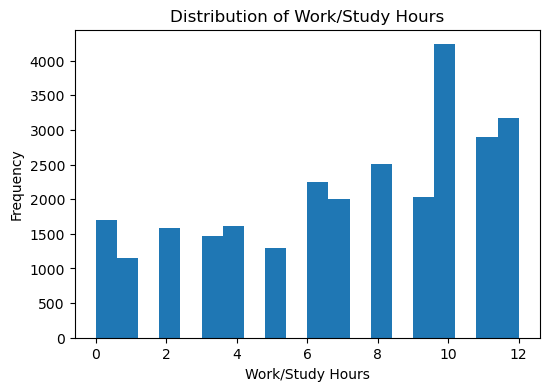

In [16]:
## Work/Study Hours

plt.figure(figsize=(6,4))
plt.hist(df['Work/Study Hours'], bins=20)
plt.title("Distribution of Work/Study Hours")
plt.xlabel("Work/Study Hours")
plt.ylabel("Frequency")
plt.show()

Interpretation: This histogram shows the distribution of the feature "Work/Study Hours" which from the graph is right skewed. The data points represent the number of hours the individual spend on work or study and most of the data points are concentrated within the 8 to 12 hour mark. This shows the intensive work and study hours these individuals put in. In conclusion, the skewed nature of the data points suggest that this feature may need some tranforming and outlier handling before modelling. 

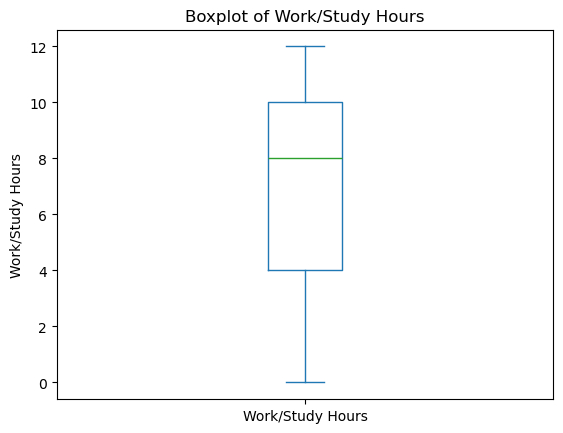

In [17]:
## Work/Study Hours

df['Work/Study Hours'].plot(kind='box')
plt.title("Boxplot of Work/Study Hours")
plt.ylabel("Work/Study Hours")
plt.show()

Interpretation: This boxplot shows the distribution of the feature "Work/Study Hours" in terms of its spread and outliers. From the boxplot, the data is right-skewed but does not have outliers. The median of this feature is 8 hours which is how much time an individual spends on work or study. The interquatile range spans between 4 to 10 hours, showing moderate variability in the workload among the individuals in this dataset. No data points fall outside of the box plot and therefore there are no significant outliers. In conclusion, this feature does not need to be pre-processed with outlier removal and can be used for modelling without any or minimal processing. 

Bar Charts are used to analyse the distribution of categorical features

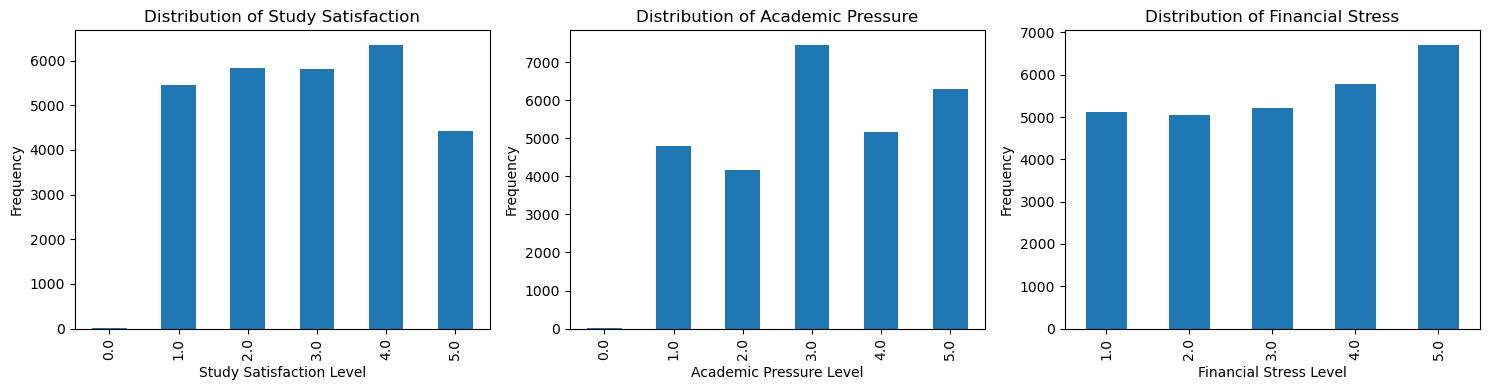

In [18]:
plt.figure(figsize=(15, 4))

# Study Satisfaction
plt.subplot(1, 3, 1)
df['Study Satisfaction'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Study Satisfaction')
plt.xlabel('Study Satisfaction Level')
plt.ylabel('Frequency')

# Academic Pressure
plt.subplot(1, 3, 2)
df['Academic Pressure'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Academic Pressure')
plt.xlabel('Academic Pressure Level')
plt.ylabel('Frequency')

# Financial Stress
plt.subplot(1, 3, 3)
df['Financial Stress'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Financial Stress')
plt.xlabel('Financial Stress Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Intepretation: These three features were visualised side by side using bar charts because they are ordinal variables. Bar charts are the most suitable for ordinal features as they accurately display the frequency of each category without the continous numeric intervals. These three features are well spread and indicates sufficient variability in the dataset. The absense of any skewness with these three features suggests that these features can be used without any data pre-processing.

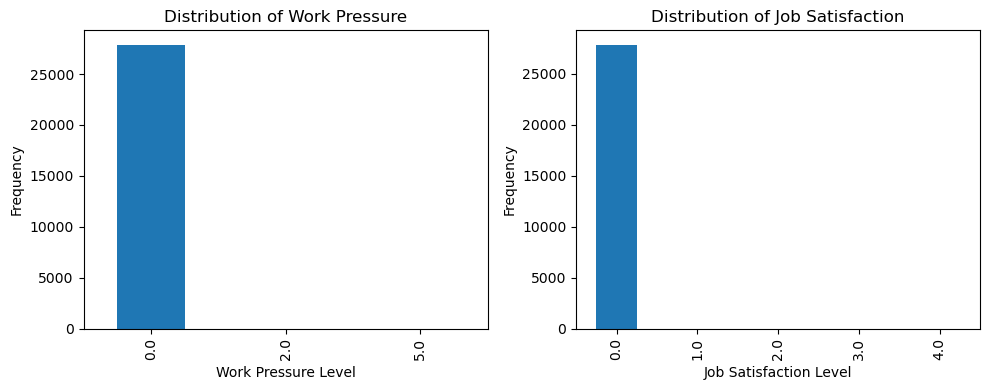

In [19]:
plt.figure(figsize=(10,4))

# Work Pressure
plt.subplot(1,2,1)
df['Work Pressure'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Work Pressure")
plt.xlabel("Work Pressure Level")
plt.ylabel("Frequency")

# Job Satisfaction
plt.subplot(1,2,2)
df['Job Satisfaction'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Interpretation: These bar charts shows the distribution these two features and it is evident that both features' data points are heavily concentrated at the 0 mark, which suggests that the majority of students indicated that they have no work pressure or job satisfaction. This extreme skewness shown by the bar charts indicates low variance across the two features. These feature distributions suggest that most of the individuals in the dataset are not employed and therefore these features should be considered to drop as they can introduce noise and negatively affect model performance due to their low varability. 

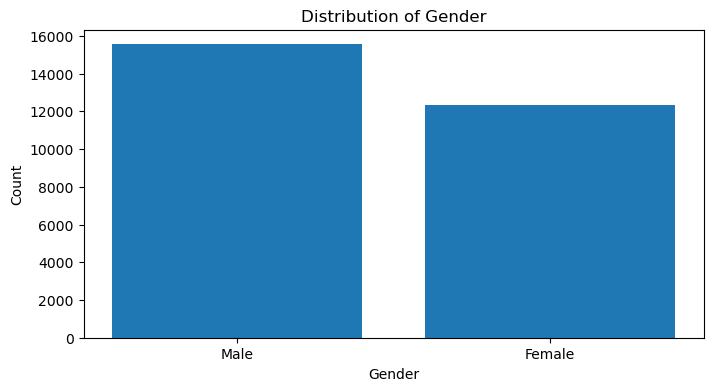

In [20]:
counts = df['Gender'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Intepretation: This bar chart shows the distribution of gender within the dataset. From the bar chart, I observed that the gender is slightly inbalanced with male being more than the female. This suggests that the data is skewed towards the male participants in this dataset and therefore may affect model learning if used as a predictive feature. The model may be more influenced by the majority class, negtively affecting the training of the model. However, the inbalance is not extreme and both categories are well represented. If the correct and appropriate metric is used to evaluate the model, it is still a viable feature for inclusion. 

In [21]:
df['City'].describe()

count      27898
unique        52
top       Kalyan
freq        1570
Name: City, dtype: object

Intepretation: The feature City is analysed using .describe() instead of the bar chart due to its high cardinality. This lead to the bar chart having overlapping labels on the x-axis and hard to intepret using a bar chart. There are a total of 52 unique cities in this dataset and this high number of unique values can lead to high dimentionality when one-hot encoding this feature. This can introduce sparsity and cause overfitting during model training. This feature should be considered to be dropped during feature engineering.

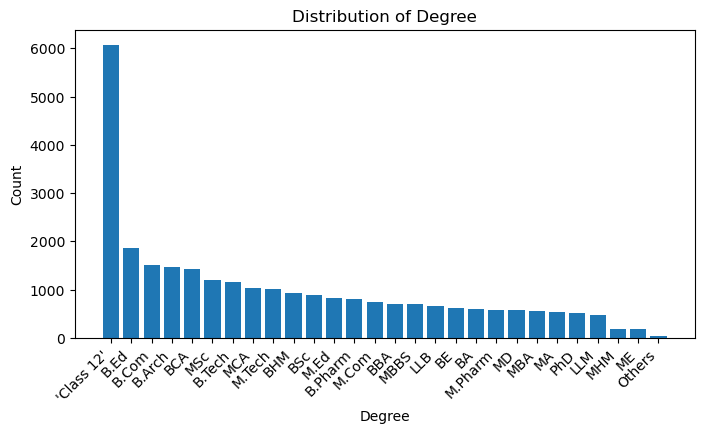

In [36]:
counts = df['Degree'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Degree")
plt.xlabel("Degree")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shows the distribution of the feature "Degree" in this dataset. The feature has a large number of unique categories with very uneven categories. One category which is 'Class 12' dominates this feature while the other degree types have samll number of data points which causes a very inbalanced and long-tailed distribution. This feature indicates that many of the individuals comes from diverse educational backgrounds, however the distribution is uneven with many of the categories being sparsely populated. This increase the risk of noise during modelling and significantly lowers the reliability of the model learning the patterns from this feature. "Degree" is also a high-cardinality categorical feature which will lead to high dimentionality and overfitting if directly used after one-hot encoding. This feature should be considered to be dropped during feature selection.    

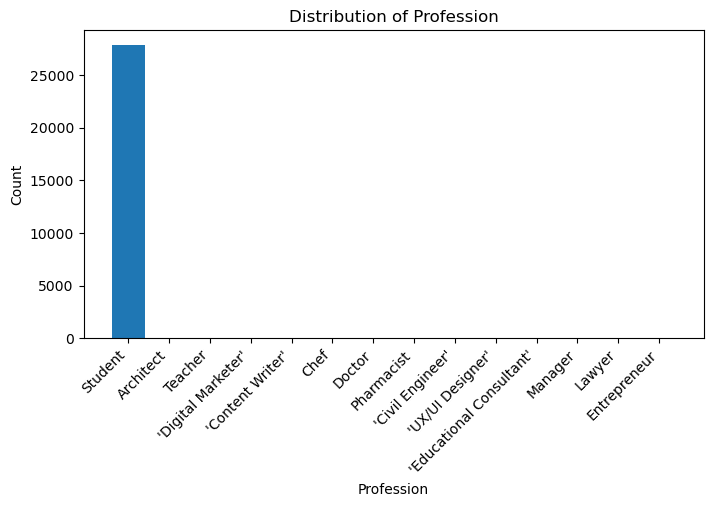

In [22]:
counts = df['Profession'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Profession")
plt.xlabel("Profession")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shows the distribution of the feature "Profession" in this dataset. From the bar chart, this feature shows severe class inbalance with the student category having the overwhelming number of datapoints comapared to the other categories. This distribution shows the extremely low variability in this feature and unlikely to provide any meaningful contribution during model training. Introducing this feature during modelling can also lead to sevral issues. Directly one-hot encoding this feature will lead to sparsity and will increase the model complexity without providing any benefit.

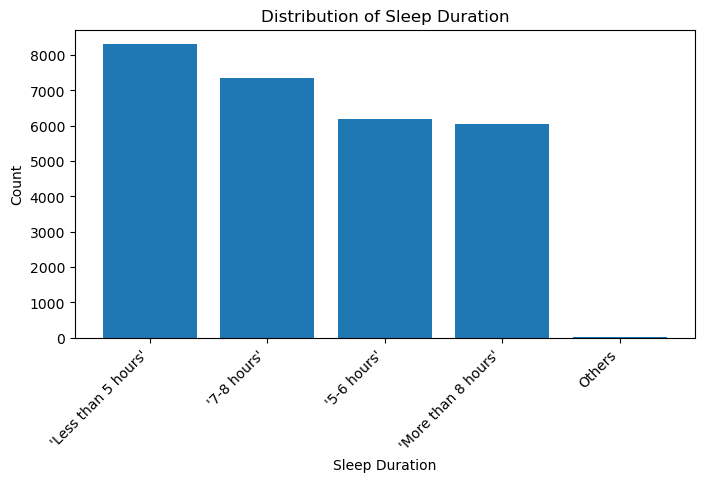

In [23]:
counts = df['Sleep Duration'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shows the distribution of the feature "Sleep Duration" which is a categorical ordinal feature. The most frequent category is “Less than 5 hours”, followed by “7–8 hours”, “5–6 hours”, and “More than 8 hours” while the "Others" category has very few data points. The presence of meaningful data points across all categories indicated that there is adequate variability across all the categories, making it usefulk to use during modelling. Sleep duration is an important predictor as sleep deprivation is associated with depression symptoms. However, the "Others" category is very sparse and may need to be processed or merged to aviod introducing noice into the model.

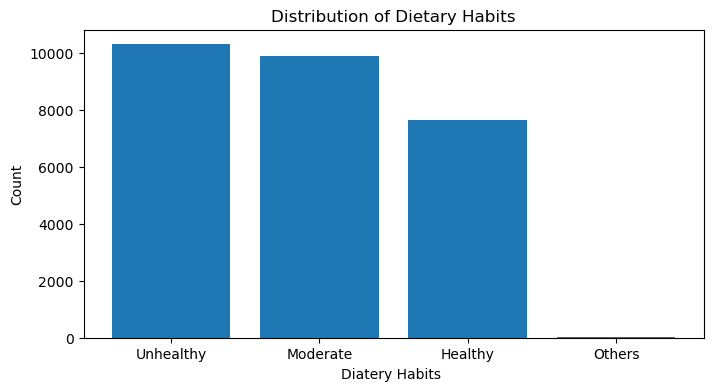

In [24]:
counts = df['Dietary Habits'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Dietary Habits")
plt.xlabel("Diatery Habits ")
plt.ylabel("Count")
plt.show()

 Intepretation: The bar chart shows the distribution of the feature "Dietary habits" in this dataset. The most frequent category is “Unhealthy”, followed by “Moderate”, “Healthy”, and "Others" category has very few data points. The presence of meaningful points across the categories indicates that the feature has sufficient variability to be introduce meaningful and informative influence during modeling. Dietary Habits may be a relevant predictor for depression as eating patterns are associated with depression and mental health. However, the "Others" category is very sparse and may need to be processed or merged to aviod introducing noice into the model.

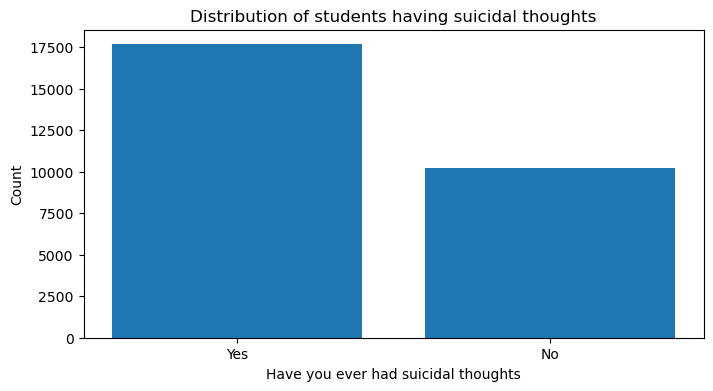

In [ ]:
counts = df['Have you ever had suicidal thoughts ?'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of students having suicidal thoughts")
plt.xlabel("Have you ever had suicidal thoughts")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shows the distribution for the feature "Have you ever had suicidal thoughts ?" for the dataset. This feature is a binary categorical feature with two valuse either Yes or No. The distribution suggests that more students has sucidal thoughts compared to those who have not. This feature has high relevance to the target variable and therefore a strong predictor for Depression. However this feature should be used with caution or even in consideration to drop as due to the high risk of data leak by proxy. This feature is very relevant to depression and may act as a proxy for the target variable. This may inflate the model's performance and reduce the applicability of this model in the real-world.

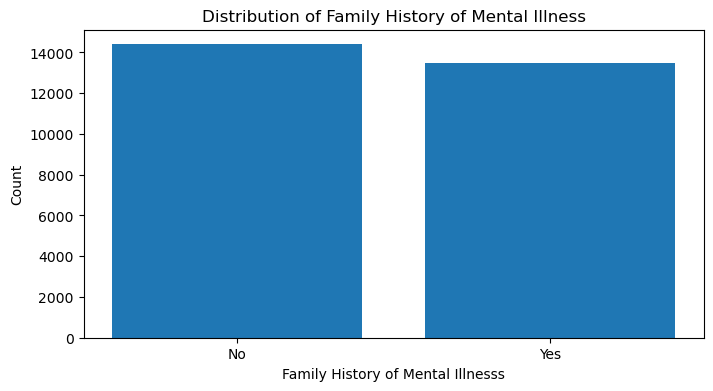

In [27]:
counts = df['Family History of Mental Illness'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Family History of Mental Illness")
plt.xlabel("Family History of Mental Illnesss")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shoes the distribution of the feature "Family History of Mental Illness" which is a binary categorical feature. The distribution between Yes and No is balanced with the absence of family history of metal illness being slightly higher. This suggests good variability within the data and will be useful for the model to learn the patterns of teh feature without being bias to one outcome. Family History of Mental Illness is a risk factor associated with mental health and depression, therefore this feature will be useful during modelling.

### 2.3.2 Understanding relationship between variables

In [28]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [29]:
## Clean data

## 3.2 Train-Test Split

In [30]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [31]:
## Initialise and train model


# 5. Model Evaluation

In [32]:
## Evaluate model


In [33]:
## New data

## Predict


## Iterative model development


In [34]:
## Further feature engineering / feature selection